In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
import math as m

In [2]:
from sklearn.ensemble import IsolationForest

In [3]:
cd with_same_ship_ids_between_db/

/Users/maria/Desktop/Датасет_рыба/with_same_ship_ids_between_db


In [7]:
catch = pd.read_csv("catch.csv")

In [4]:
product = pd.read_csv("product.csv")

In [5]:
ext1 = pd.read_csv("Ext.csv")
ext2 = pd.read_csv("Ext2.csv")

In [8]:
catch_product = pd.merge(catch, product, how="outer", on=['id_ves','date'])

In [9]:
catch_product['catch_volume'] = catch_product['catch_volume'].apply(lambda x: x*1000)

In [13]:
ext1_2 = pd.merge(ext1, ext2, how="outer", on=['id_vsd'])

In [14]:
pd.options.display.float_format = '{:.0f}'.format

In [15]:
catch_volume = catch_product[['catch_volume', 'id_fish', 'id_ves','id_own']]
ext1_2_volume = ext1_2[['id_fish','volume','id_ves','id_own']]

In [17]:
grouped_catch_volume = catch_volume.groupby(['id_ves','id_own','id_fish'])["catch_volume"].sum().reset_index()

In [19]:
grouped_ext1_2_volume = ext1_2_volume.groupby(['id_ves','id_own','id_fish'])["volume"].sum().reset_index()

In [22]:
grouped_volumes = pd.merge(grouped_catch_volume, grouped_ext1_2_volume, how="inner", on=['id_own','id_fish','id_ves'])

In [23]:
grouped_volumes['volumes_diff'] = grouped_volumes['catch_volume'] - grouped_volumes['volume']
#отнимаю из улова переработку"

In [24]:
grouped_volumes_iforest = grouped_volumes

In [25]:
model=IsolationForest(n_estimators=110, max_samples='auto', contamination=float(0.25),max_features=1.0,random_state=0)
model.fit(grouped_volumes_iforest[['volumes_diff']])

IsolationForest(contamination=0.25, n_estimators=110, random_state=0)

In [26]:
grouped_volumes_iforest['scores']=model.decision_function(grouped_volumes_iforest[['volumes_diff']])
grouped_volumes_iforest['anomaly']=model.predict(grouped_volumes_iforest[['volumes_diff']])

,id_ves,id_own,id_fish,catch_volume,volume,volumes_diff,scores,anomaly
0,1284,1047,88,293274,6352,286922,0,1
1,1284,1047,147,920156,23276,896880,0,1
2,1284,1047,292,81850874,2131328,79719546,-0,-1
3,1284,1047,408,13272521,638893,12633628,-0,-1
4,1284,1047,410,3947762,97004,3850758,-0,-1
5,1284,1047,610,1408508,33053,1375455,-0,-1
6,1284,1047,616,117060,2862,114198,0,1
7,1284,1047,617,1243345,34903,1208442,0,1
8,1284,1047,714,2033751,41012,1992739,-0,-1
9,1284,1047,721,125728,6509,119219,0,1


As you can see above for the predicted anomalies the anomaly column values would be -1 and their scores will be negative.

In [27]:
anomaly_if=grouped_volumes_iforest.loc[grouped_volumes_iforest['anomaly']==-1]
anomaly_index=list(anomaly_if.index)

In [169]:
anomaly_if.id_own.unique() #это владельцы

array([1091,  903, 1028, 1047, 1156, 1217, 1114, 1219,  941,  898, 1212,
        959, 1002,  956, 1234,  925, 1200, 1060, 1274,  937,  989,  981,
       1011,  905, 1027, 1144,  953, 1282,  960, 1244, 1227, 1160, 1177,
       1014,  967, 1072,  961, 1203, 1233,  978,  995, 1210, 1081, 1207,
       1001, 1187, 1228, 1055,  927, 1271, 1037, 1121, 1153,  979, 1111,
       1133, 1085, 1236,  948,  992, 1266, 1041, 1175, 1269,  951, 1015,
       1196,  949, 1096, 1241, 1046,  897,  940, 1103, 1050, 1163, 1152,
       1164, 1106, 1202, 1186, 1039,  928,  997,  964,  983, 1062,  996,
       1198,  955])

In [30]:
anomaly_if.id_fish.unique() #это айди рыбы

array([292., 408., 410., 610., 714., 400.,  88., 113., 144., 409., 304.,
       204., 645., 222., 888., 451., 692., 859., 147., 617., 738., 403.,
       294., 203.])

In [33]:
merged = pd.merge(catch_product, ext1_2, how="left", on=['id_own','id_fish','id_ves'])

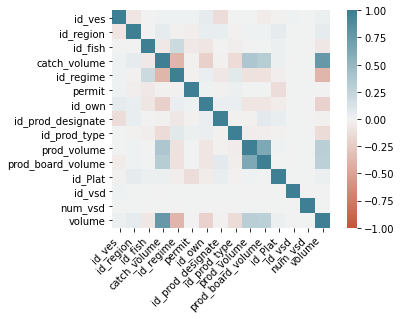

In [74]:
corr = merged.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

fig = ax.get_figure()
fig.savefig("corr.png") 

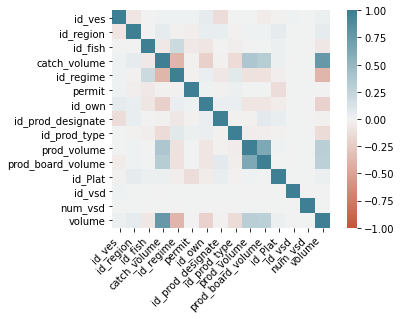

In [75]:
corr = merged.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

fig = ax.get_figure()
fig.savefig("corr.png") 

In [35]:
grouped_volumes_iforest.head()

,id_ves,id_own,id_fish,catch_volume,volume,volumes_diff,scores,anomaly
0,1284,1047,88,293274,6352,286922,0,1
1,1284,1047,147,920156,23276,896880,0,1
2,1284,1047,292,81850874,2131328,79719546,-0,-1
3,1284,1047,408,13272521,638893,12633628,-0,-1
4,1284,1047,410,3947762,97004,3850758,-0,-1


In [55]:
grouped_volumes_iforest_fish = grouped_volumes_iforest.groupby(['id_fish','anomaly'])['volumes_diff'].sum().reset_index()
grouped_volumes_iforest_fish

,id_fish,anomaly,volumes_diff
0,6,1,-148663
1,88,-1,42624745
2,88,1,18777903
3,90,1,340776
4,112,1,1488106
5,113,-1,7997410
6,113,1,12910864
7,114,1,59213
8,144,-1,5054349
9,144,1,3048185


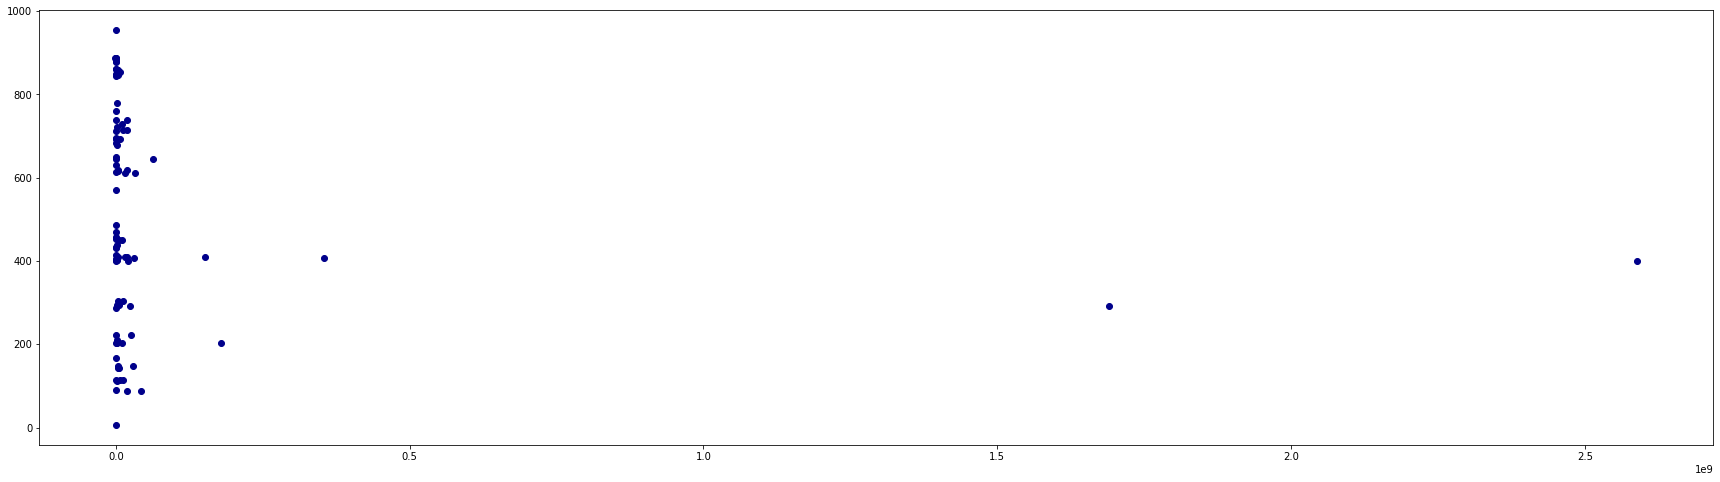

In [72]:
plt.figure(figsize=(30, 8))
plt.scatter(grouped_volumes_iforest_fish['volumes_diff'],grouped_volumes_iforest_fish['id_fish'],color='darkblue')